In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
data_path = r'reviews_data_dump\\reviews_tea\\data.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Total reviews: {len(df)}")
print(f"\nFirst few rows:")
print(df.head())

Dataset loaded successfully!
Total reviews: 9170

First few rows:
       reviewer_name  reviewer_rating        review_title  \
0   Subhro  Banerjee                5   Worth every penny   
1  Shiv chandra  Jha                5       Great product   
2  Flipkart Customer                5  Highly recommended   
3              DTH Y                4           Very Good   
4    Bhavesh Godhani                5      Classy product   

                                         review_text  \
0  Great product 🤗 with great deals 😍😍 Tata Tea G...   
1  Very nice and super qwality tea taste are grea...   
2  Great test great quality great price point tim...   
3                                    Nice 😊READ MORE   
4               Very Good Tata tea product.READ MORE   

                   place_of_review     Date_of_review  up_votes  Down_votes  
0     Certified Buyer, Budge Budge   Subhro  Banerjee       236          59  
1         Certified Buyer, Saharsa  Shiv chandra  Jha       225          7

In [3]:
print("Dataset Information:")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("\nDataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9170 entries, 0 to 9169
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewer_name    9170 non-null   object
 1   reviewer_rating  9170 non-null   int64 
 2   review_title     9170 non-null   object
 3   review_text      9170 non-null   object
 4   place_of_review  9170 non-null   object
 5   Date_of_review   9170 non-null   object
 6   up_votes         9170 non-null   int64 
 7   Down_votes       9170 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 573.2+ KB


Dataset Shape: (9170, 8)

Column Names:
['reviewer_name', 'reviewer_rating', 'review_title', 'review_text', 'place_of_review', 'Date_of_review', 'up_votes', 'Down_votes']


In [4]:
print("Statistical Summary:")
print("=" * 50)
print(df.describe(include='all'))

Statistical Summary:
           reviewer_name  reviewer_rating    review_title  \
count               9170      9170.000000            9170   
unique                10              NaN               9   
top     Subhro  Banerjee              NaN  Simply awesome   
freq                 917              NaN            1834   
mean                 NaN         4.400000             NaN   
std                  NaN         1.200065             NaN   
min                  NaN         1.000000             NaN   
25%                  NaN         4.000000             NaN   
50%                  NaN         5.000000             NaN   
75%                  NaN         5.000000             NaN   
max                  NaN         5.000000             NaN   

                                              review_text  \
count                                                9170   
unique                                                 10   
top     Great product 🤗 with great deals 😍😍 Tata Tea G...   
fr

Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


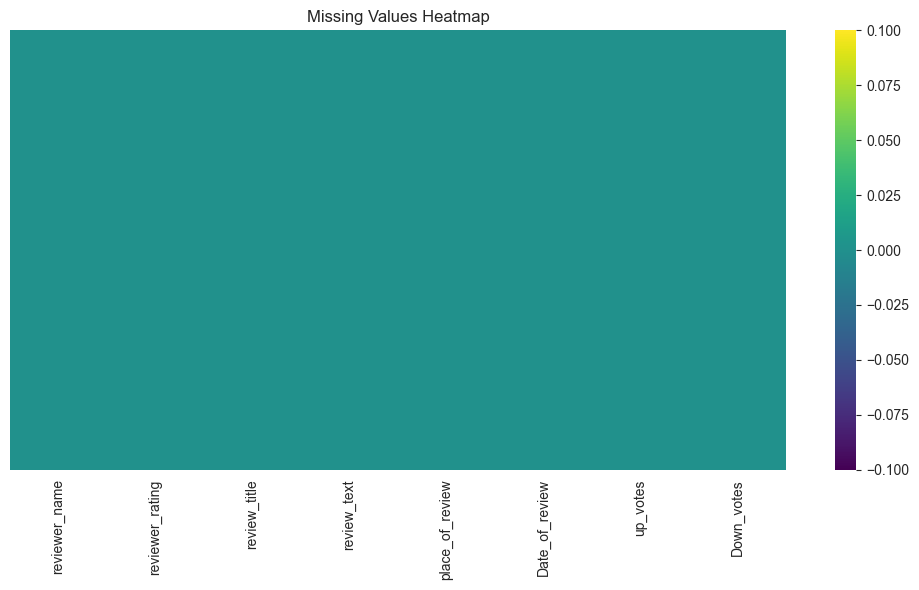

In [5]:
print("Missing Values Analysis:")
print("=" * 50)
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

Rating Distribution:
reviewer_rating
1     917
4    1834
5    6419
Name: count, dtype: int64

Average Rating: 4.40
Median Rating: 5


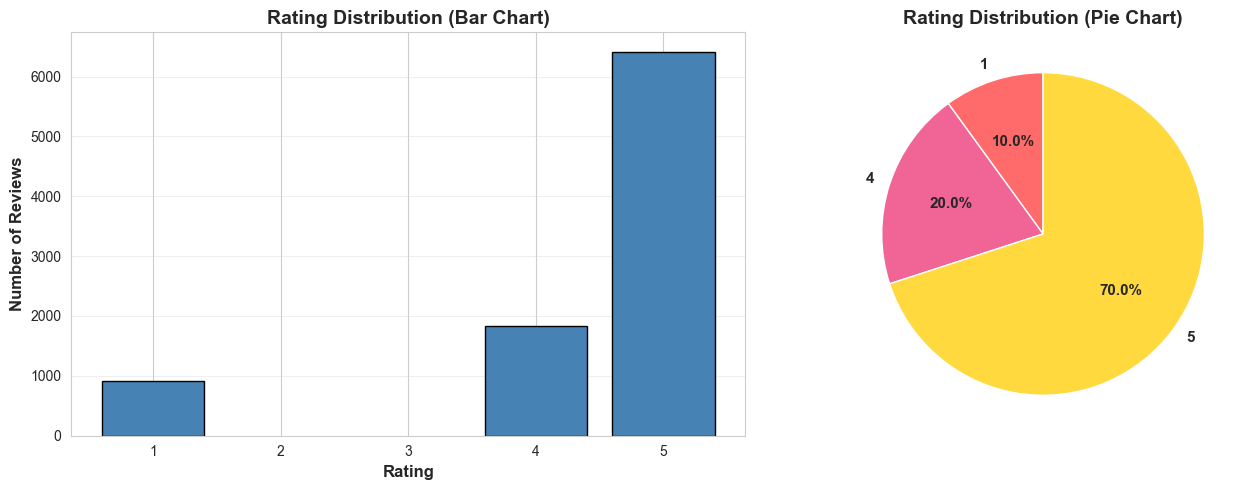

In [6]:
print("Rating Distribution:")
print("=" * 50)
rating_counts = df['reviewer_rating'].value_counts().sort_index()
print(rating_counts)
print(f"\nAverage Rating: {df['reviewer_rating'].mean():.2f}")
print(f"Median Rating: {df['reviewer_rating'].median():.0f}")

# Visualize rating distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Rating', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
axes[0].set_title('Rating Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[0].set_xticks([1, 2, 3, 4, 5])
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
colors = ['#ff6b6b', '#f06595', '#ffd93d', '#95e1d3', '#6bcf7f']
axes[1].pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Rating Distribution (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Sentiment Label Distribution (Proposed):
Positive Sentiment (4-5 stars): 8253
Negative Sentiment (1-2 stars): 917
Neutral (3 stars) - Will be excluded: 0


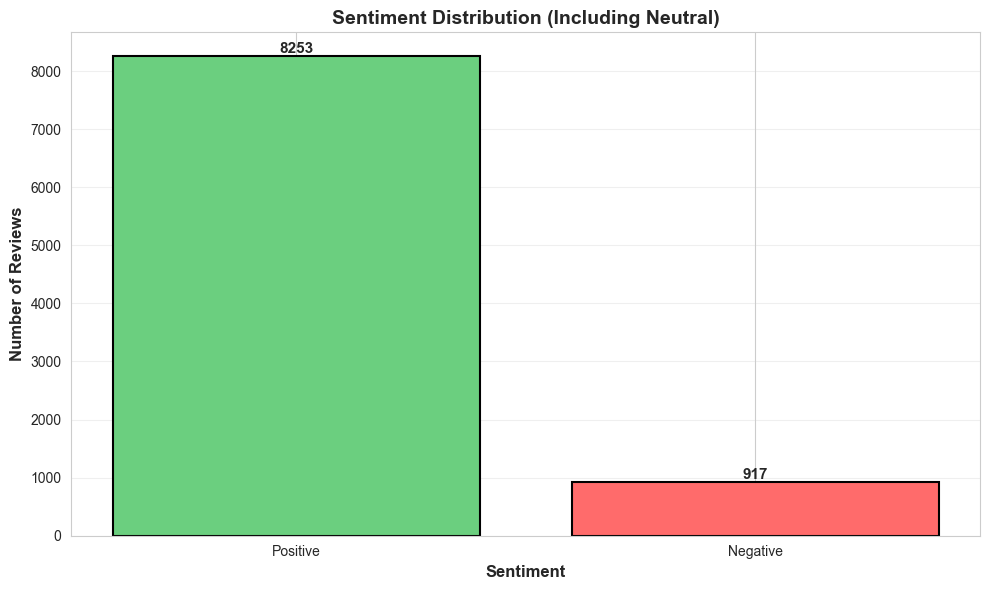


Class Balance (Positive vs Negative):
Ratio (Positive:Negative) = 9.00:1
  Class imbalance detected - may need SMOTE or class weights


In [8]:
print("Sentiment Label Distribution (Proposed):")
print("=" * 50)
print("Positive Sentiment (4-5 stars):", len(df[df['reviewer_rating'].isin([4, 5])]))
print("Negative Sentiment (1-2 stars):", len(df[df['reviewer_rating'].isin([1, 2])]))
print("Neutral (3 stars) - Will be excluded:", len(df[df['reviewer_rating'] == 3]))

# Create temporary sentiment column for visualization
def map_sentiment(rating):
    if rating in [4, 5]:
        return 'Positive'
    elif rating in [1, 2]:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['reviewer_rating'].apply(map_sentiment)
sentiment_counts = df['Sentiment'].value_counts()

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
colors_sentiment = {'Positive': '#6bcf7f', 'Negative': '#ff6b6b', 'Neutral': '#ffd93d'}
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, 
               color=[colors_sentiment[x] for x in sentiment_counts.index], 
               edgecolor='black', linewidth=1.5)

plt.xlabel('Sentiment', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')
plt.title('Sentiment Distribution (Including Neutral)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Check class balance
print(f"\nClass Balance (Positive vs Negative):")
print("=" * 50)
positive_count = len(df[df['reviewer_rating'].isin([4, 5])])
negative_count = len(df[df['reviewer_rating'].isin([1, 2])])
balance_ratio = positive_count / negative_count if negative_count > 0 else 0
print(f"Ratio (Positive:Negative) = {balance_ratio:.2f}:1")
if balance_ratio > 1.5 or balance_ratio < 0.67:
    print("  Class imbalance detected - may need SMOTE or class weights")
else:
    print(" Classes are relatively balanced")

Review Text Analysis:
Average review length (characters): 102
Average word count: 19

Review Length Statistics:
count    9170.000000
mean      102.200000
std       111.884428
min        13.000000
25%        27.000000
50%        52.500000
75%       102.000000
max       362.000000
Name: review_length, dtype: float64


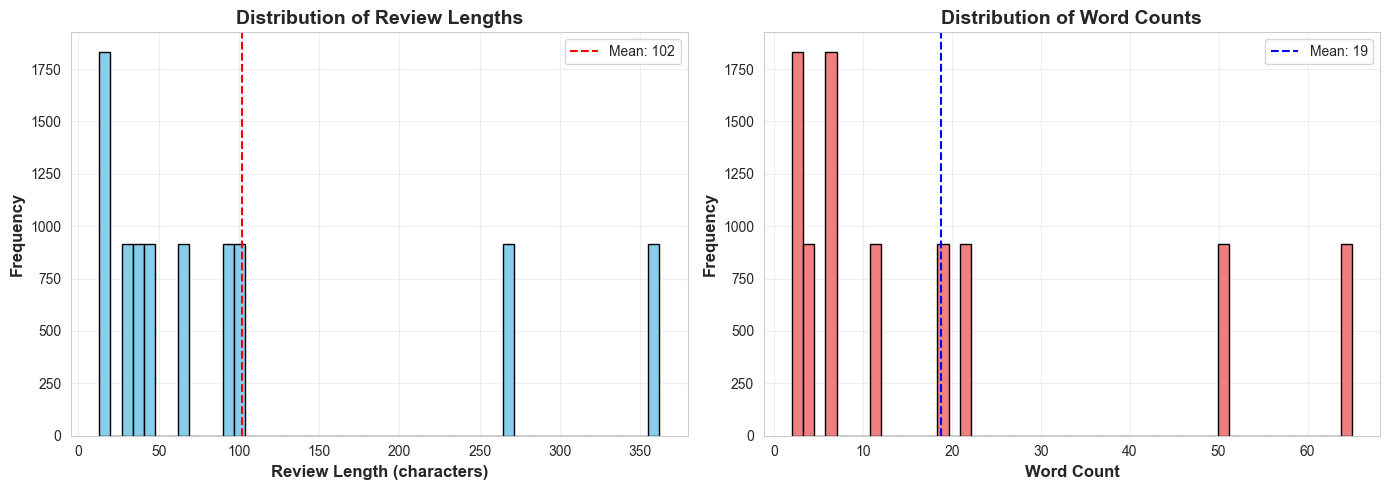

In [9]:
print("Review Text Analysis:")
print("=" * 50)

# Handle missing review text
df['review_text'] = df['review_text'].fillna('')
df['review_length'] = df['review_text'].apply(len)
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

print(f"Average review length (characters): {df['review_length'].mean():.0f}")
print(f"Average word count: {df['word_count'].mean():.0f}")
print(f"\nReview Length Statistics:")
print(df['review_length'].describe())

# Visualize review length distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character length distribution
axes[0].hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Review Length (characters)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Review Lengths', fontsize=14, fontweight='bold')
axes[0].axvline(df['review_length'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["review_length"].mean():.0f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Word count distribution
axes[1].hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Word Count', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Word Counts', fontsize=14, fontweight='bold')
axes[1].axvline(df['word_count'].mean(), color='blue', linestyle='--', 
                label=f'Mean: {df["word_count"].mean():.0f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


Review Length by Sentiment:
            count       mean        std   min   25%   50%   75%   max
Sentiment                                                            
Negative    917.0  11.000000   0.000000  11.0  11.0  11.0  11.0  11.0
Positive   8253.0  19.666667  21.500657   2.0   4.0   7.0  21.0  65.0


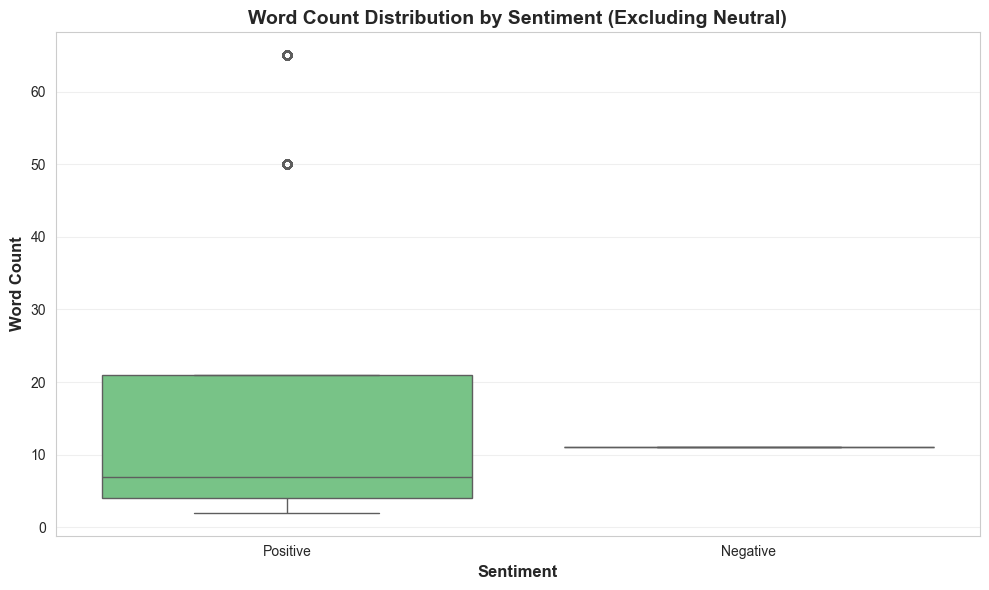

In [10]:
print("\nReview Length by Sentiment:")
print("=" * 50)
length_by_sentiment = df.groupby('Sentiment')['word_count'].describe()
print(length_by_sentiment)

# Box plot
plt.figure(figsize=(10, 6))
df_no_neutral = df[df['Sentiment'] != 'Neutral']
sns.boxplot(data=df_no_neutral, x='Sentiment', y='word_count', 
            palette={'Positive': '#6bcf7f', 'Negative': '#ff6b6b'})
plt.xlabel('Sentiment', fontsize=12, fontweight='bold')
plt.ylabel('Word Count', fontsize=12, fontweight='bold')
plt.title('Word Count Distribution by Sentiment (Excluding Neutral)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Generating Word Clouds...



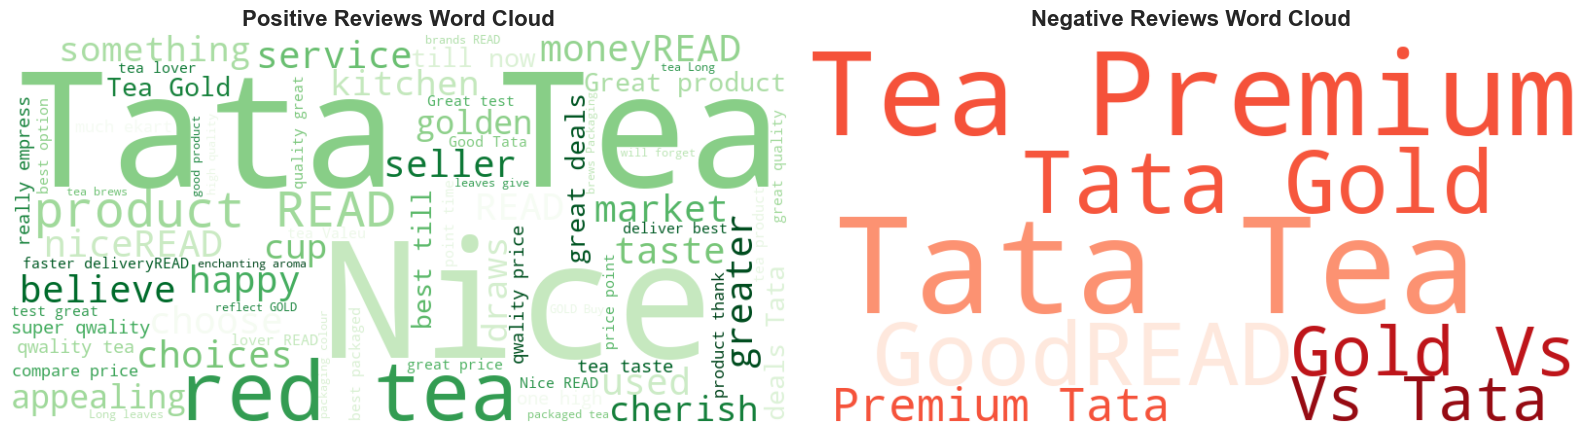

 Word clouds generated successfully!


In [11]:
print("Generating Word Clouds...\n")

positive_reviews = ' '.join(df[df['reviewer_rating'].isin([4, 5])]['review_text'].astype(str))
negative_reviews = ' '.join(df[df['reviewer_rating'].isin([1, 2])]['review_text'].astype(str))

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Positive reviews word cloud
if positive_reviews.strip():
    wordcloud_positive = WordCloud(width=800, height=400, 
                                   background_color='white',
                                   colormap='Greens',
                                   max_words=100).generate(positive_reviews)
    axes[0].imshow(wordcloud_positive, interpolation='bilinear')
    axes[0].set_title('Positive Reviews Word Cloud', fontsize=16, fontweight='bold')
    axes[0].axis('off')

# Negative reviews word cloud
if negative_reviews.strip():
    wordcloud_negative = WordCloud(width=800, height=400, 
                                   background_color='white',
                                   colormap='Reds',
                                   max_words=100).generate(negative_reviews)
    axes[1].imshow(wordcloud_negative, interpolation='bilinear')
    axes[1].set_title('Negative Reviews Word Cloud', fontsize=16, fontweight='bold')
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print(" Word clouds generated successfully!")

In [12]:
from collections import Counter
import re

def get_top_words(text, n=20):
    """Extract top n most common words from text"""
    words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    return Counter(words).most_common(n)

print("Top 20 Most Common Words in Positive Reviews:")
print("=" * 50)
top_positive = get_top_words(positive_reviews, 20)
for word, count in top_positive:
    print(f"{word:20s}: {count:4d}")

print("\nTop 20 Most Common Words in Negative Reviews:")
print("=" * 50)
top_negative = get_top_words(negative_reviews, 20)
for word, count in top_negative:
    print(f"{word:20s}: {count:4d}")

Top 20 Most Common Words in Positive Reviews:
more                : 8253
tea                 : 7336
read                : 5502
and                 : 5502
great               : 4585
the                 : 4585
product             : 3668
very                : 3668
you                 : 3668
for                 : 3668
best                : 2751
nice                : 2751
price               : 2751
tata                : 1834
gold                : 1834
qwality             : 1834
taste               : 1834
high                : 1834
quality             : 1834
red                 : 1834

Top 20 Most Common Words in Negative Reviews:
tata                : 2751
tea                 : 1834
premium             : 1834
gold                :  917
goodread            :  917
more                :  917


In [13]:
print("Additional Features Analysis:")
print("=" * 50)

# Up votes and down votes
print(f"\nUp Votes Statistics:")
print(df['up_votes'].describe())
print(f"\nDown Votes Statistics:")
print(df['Down_votes'].describe())

# Date analysis - Note: The original column name is 'Date_of_review'
print(f"\nDate Analysis:")
print(f"Date column unique values: {df['Date_of_review'].unique()[:10]}")
print(f"Number of unique dates: {df['Date_of_review'].nunique()}")

Additional Features Analysis:

Up Votes Statistics:
count    9170.000000
mean       80.747001
std        78.390238
min        13.000000
25%        26.000000
50%        50.500000
75%        89.000000
max       236.000000
Name: up_votes, dtype: float64

Down Votes Statistics:
count    9170.000000
mean       24.300000
std        24.602358
min         2.000000
25%         5.000000
50%        16.000000
75%        29.000000
max        79.000000
Name: Down_votes, dtype: float64

Date Analysis:
Date column unique values: ['Subhro  Banerjee' 'Shiv chandra  Jha' 'Flipkart Customer' 'DTH Y'
 'Bhavesh Godhani' 'Omm Prakash ' 'Ritu Raj' 'Arun Saini' 'Amitabh Shahi'
 'Rohan  Bhowmik ']
Number of unique dates: 10


In [15]:
print("\n" + "=" * 70)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("=" * 70)

print(f"\n1. DATASET SIZE:")
print(f"   - Total reviews: {len(df):,}")
print(f"   - Usable for training (excluding neutral): {len(df[df['reviewer_rating'] != 3]):,}")

print(f"\n2. CLASS DISTRIBUTION:")
print(f"   - Positive reviews (4-5 stars): {positive_count:,} ({positive_count/len(df)*100:.1f}%)")
print(f"   - Negative reviews (1-2 stars): {negative_count:,} ({negative_count/len(df)*100:.1f}%)")
print(f"   - Balance ratio: {balance_ratio:.2f}:1")
if balance_ratio > 1.5:
    print("     Recommendation: Use class_weight='balanced' or SMOTE")

print(f"\n3. TEXT CHARACTERISTICS:")
print(f"   - Average review length: {df['word_count'].mean():.0f} words")
print(f"   - Shortest review: {df['word_count'].min():.0f} words")
print(f"   - Longest review: {df['word_count'].max():.0f} words")

print(f"\n4. DATA QUALITY:")
missing_reviews = df['review_text'].isna().sum()
print(f"   - Missing reviews: {missing_reviews} ({missing_reviews/len(df)*100:.1f}%)")
if missing_reviews > 0:
    print("     Recommendation: Remove or handle missing reviews in preprocessing")

print(f"\n5. NEXT STEPS:")
print("    Proceed with data preprocessing (2_data_preprocessing.ipynb)")
print("   Implement text cleaning and normalization")
print("    Create binary sentiment labels")
print("    Handle class imbalance if necessary")

print("\n" + "=" * 70)
print(" Data exploration completed!")
print("=" * 70)


KEY INSIGHTS AND RECOMMENDATIONS

1. DATASET SIZE:
   - Total reviews: 9,170
   - Usable for training (excluding neutral): 9,170

2. CLASS DISTRIBUTION:
   - Positive reviews (4-5 stars): 8,253 (90.0%)
   - Negative reviews (1-2 stars): 917 (10.0%)
   - Balance ratio: 9.00:1
     Recommendation: Use class_weight='balanced' or SMOTE

3. TEXT CHARACTERISTICS:
   - Average review length: 19 words
   - Shortest review: 2 words
   - Longest review: 65 words

4. DATA QUALITY:
   - Missing reviews: 0 (0.0%)

5. NEXT STEPS:
    Proceed with data preprocessing (2_data_preprocessing.ipynb)
   Implement text cleaning and normalization
    Create binary sentiment labels
    Handle class imbalance if necessary

 Data exploration completed!
